# Single transit search

## Simulate data

/Users/lgrcia/code/nuance/nuance/nuance.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


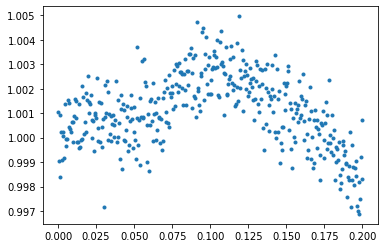

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from nuance.utils import transit

time = np.linspace(0, 0.2, 400)
diff_error = 0.001
X = np.vander(time, N=4, increasing=True)
w = [1., 0.05, -0.2, -0.5]
diff_flux = transit(time, 0.2/4, 0.05, 0.001) + np.random.normal(0., diff_error, size=len(time)) + X@w

plt.plot(time, diff_flux, ".")

## Single transit (linear) search

In [3]:
from nuance import Nuance

nu = Nuance(time, diff_flux, diff_error, X.T)

t0s = time.copy()
durations = np.linspace(0.01, 0.1, 10)
ls, depths, depths_var = nu.linear_search(t0s, durations)

  0%|          | 0/400 [00:00<?, ?it/s]

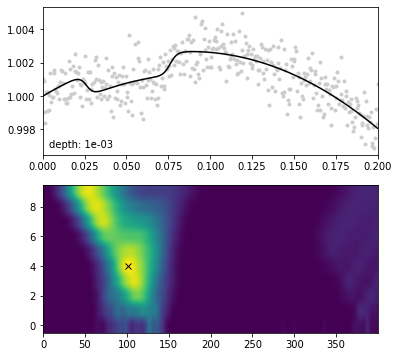

In [4]:
i, j = np.unravel_index(np.argmax(ls), ls.shape)
t0, D = t0s[i], durations[j]
mean, astro, noise = nu.models(t0, D)

plt.figure(None, (6, 6))
plt.subplot(211)
plt.plot(time, diff_flux, ".", c="0.8")
plt.plot(time, mean + astro + noise, c="k")
plt.xlim(time.min(), time.max())
plt.text(0.02, 0.05, f"depth: {nu.depth(t0, D)[0]:2.0e}", transform=plt.gca().transAxes)
plt.subplot(212)
plt.plot(i, j, "x", c="k")
plt.imshow(ls.T, aspect='auto', origin="lower")

In [5]:
w0, v0 = nu.solve(t0, D)
snr = w0[-1]/np.sqrt(v0[-1, -1])

print(f"""
S/N\t{snr:.2f}
t0\t{t0:.5f} days
D\t{D:.2f} days
depth\t{w0[-1]:3.2e}
""")


S/N	6.92
t0	0.05113 days
D	0.05 days
depth	1.39e-03

